# Problem 1 : Solar irradiance prediction
## Data analysis

In [1]:
import json
#import h5netcdf
import numpy as np
#import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
import os
os.getcwd()

'/Users/Mohammed/IFT6759/Solar-irradiance-Team08-IFT6759/Notebooks'

In [3]:
# Read the provided DataFrame (DF)
df = pd.read_pickle("../data/catalog.helios.public.20100101-20160101.pkl")

In [4]:
# Visualize the DF
df.head()

,ncdf_path,hdf5_8bit_path,hdf5_8bit_offset,hdf5_16bit_path,hdf5_16bit_offset,BND_DAYTIME,BND_CLEARSKY_GHI,BND_CLOUDINESS,BND_GHI,TBL_DAYTIME,...,GWN_CLOUDINESS,GWN_GHI,PSU_DAYTIME,PSU_CLEARSKY_GHI,PSU_CLOUDINESS,PSU_GHI,SXF_DAYTIME,SXF_CLEARSKY_GHI,SXF_CLOUDINESS,SXF_GHI
iso-datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,nan,nan,NaN,nan,NaN,0.0,0.0,night,-4.1,0.0,...,night,-7.500000,0.0,0.0,night,-1.500000,0.0,0.0,night,-3.800000
2010-01-01 00:15:00,nan,nan,NaN,nan,NaN,0.0,0.0,night,-4.1,0.0,...,night,-7.493333,0.0,0.0,night,-1.446667,0.0,0.0,night,-3.893333
2010-01-01 00:30:00,nan,nan,NaN,nan,NaN,0.0,0.0,night,-4.1,0.0,...,night,-7.420000,0.0,0.0,night,-1.766667,0.0,0.0,night,-4.166667
2010-01-01 00:45:00,nan,nan,NaN,nan,NaN,0.0,0.0,night,-4.1,0.0,...,night,-7.533333,0.0,0.0,night,-2.033333,0.0,0.0,night,-4.040000
2010-01-01 01:00:00,nan,nan,NaN,nan,NaN,0.0,0.0,night,-4.1,0.0,...,night,-7.586667,0.0,0.0,night,-2.006667,0.0,0.0,night,-4.133333


We notice here that eventhough ncdf_path contains nan values, it considered non-null values. So we need to converts nan caracters to np.NaN

In [5]:
# Replace nan characters by np.nan
df.replace('nan',np.nan)

,ncdf_path,hdf5_8bit_path,hdf5_8bit_offset,hdf5_16bit_path,hdf5_16bit_offset,BND_DAYTIME,BND_CLEARSKY_GHI,BND_CLOUDINESS,BND_GHI,TBL_DAYTIME,...,GWN_CLOUDINESS,GWN_GHI,PSU_DAYTIME,PSU_CLEARSKY_GHI,PSU_CLOUDINESS,PSU_GHI,SXF_DAYTIME,SXF_CLEARSKY_GHI,SXF_CLOUDINESS,SXF_GHI
iso-datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,night,-4.100000,0.0,...,night,-7.500000,0.0,0.0,night,-1.500000,0.0,0.000000,night,-3.800000
2010-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,night,-4.100000,0.0,...,night,-7.493333,0.0,0.0,night,-1.446667,0.0,0.000000,night,-3.893333
2010-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,night,-4.100000,0.0,...,night,-7.420000,0.0,0.0,night,-1.766667,0.0,0.000000,night,-4.166667
2010-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,night,-4.100000,0.0,...,night,-7.533333,0.0,0.0,night,-2.033333,0.0,0.000000,night,-4.040000
2010-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,night,-4.100000,0.0,...,night,-7.586667,0.0,0.0,night,-2.006667,0.0,0.000000,night,-4.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 22:45:00,/project/cq-training-1/project1/data/netcdf/GO...,/project/cq-training-1/project1/data/hdf5v7_8b...,59.0,/project/cq-training-1/project1/data/hdf5v5_16...,59.0,0.0,0.0,night,-1.926667,1.0,...,variable,19.566667,0.0,0.0,night,-1.300000,1.0,2.972854,cloudy,17.960000
2015-12-31 23:00:00,/project/cq-training-1/project1/data/netcdf/GO...,/project/cq-training-1/project1/data/hdf5v7_8b...,60.0,/project/cq-training-1/project1/data/hdf5v5_16...,60.0,0.0,0.0,night,-3.006667,1.0,...,night,3.666667,0.0,0.0,night,-1.300000,0.0,0.000000,night,5.926667
2015-12-31 23:15:00,/project/cq-training-1/project1/data/netcdf/GO...,/project/cq-training-1/project1/data/hdf5v7_8b...,61.0,/project/cq-training-1/project1/data/hdf5v5_16...,61.0,0.0,0.0,night,-3.380000,1.0,...,night,-1.946667,0.0,0.0,night,-1.300000,0.0,0.000000,night,0.146667


ncdf_path               0
hdf5_8bit_path          0
hdf5_8bit_offset       32
hdf5_16bit_path         0
hdf5_16bit_offset      32
BND_DAYTIME             0
BND_CLEARSKY_GHI      236
BND_CLOUDINESS        236
BND_GHI               388
TBL_DAYTIME             0
TBL_CLEARSKY_GHI      200
TBL_CLOUDINESS        200
TBL_GHI               714
DRA_DAYTIME             0
DRA_CLEARSKY_GHI      304
DRA_CLOUDINESS        304
DRA_GHI              1503
FPK_DAYTIME             0
FPK_CLEARSKY_GHI      256
FPK_CLOUDINESS        256
FPK_GHI               823
GWN_DAYTIME             0
GWN_CLEARSKY_GHI     2735
GWN_CLOUDINESS       2735
GWN_GHI              5062
PSU_DAYTIME             0
PSU_CLEARSKY_GHI      537
PSU_CLOUDINESS        537
PSU_GHI               765
SXF_DAYTIME             0
SXF_CLEARSKY_GHI      563
SXF_CLOUDINESS        563
SXF_GHI              1321
dtype: int64


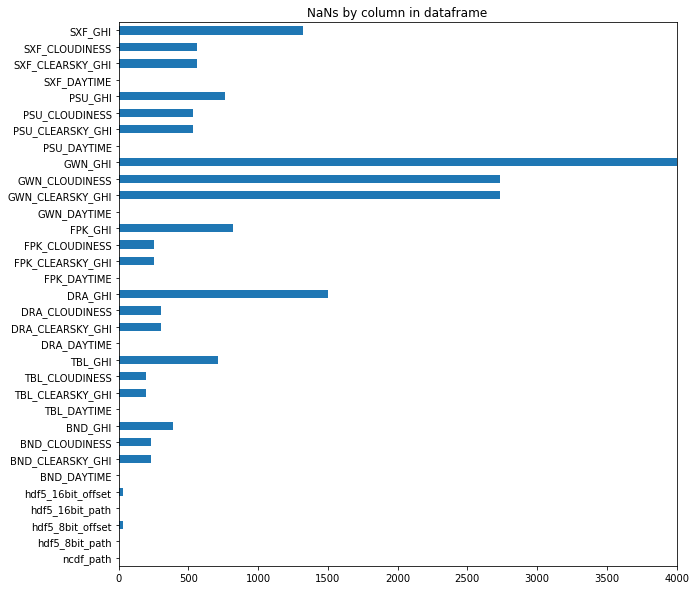

In [6]:
# How many nans by column
missing = df.isna().sum()
print(missing)
missing.plot(kind="barh", title="NaNs by column in dataframe", xlim=(0,4000), figsize=(10,10))
plt.show()

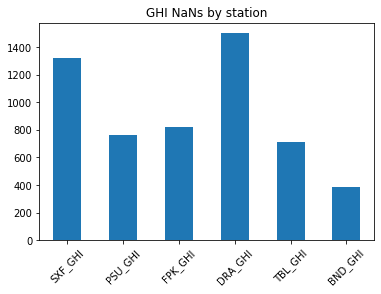

In [7]:
# How many GHI NaNs by station
stations = ["SXF", "PSU", "FPK", "DRA", "TBL", "BND"]
suffix = "_GHI"
stat_ghi = [station + suffix for station in stations]

missing[stat_ghi].plot(kind="bar", title="GHI NaNs by station")
plt.xticks(rotation=45)
plt.show()

In [8]:
# How many night and daytime per station
day ="_DAYTIME"
stat_daytime = [station + day for station in stations]

def count_days(dataframe, stations):
    for station in stations:
        stat = station.split("_")[0]
        nightime = len(dataframe[dataframe[station]==0])
        daylight = len(dataframe[dataframe[station]==1])
        perc_night = round( (nightime / (daylight + nightime)), 3) * 100
        perc_day = round( (daylight / (daylight + nightime)), 3) * 100
        print(f"There are {daylight} records of daylight ({perc_day}%) and {nightime} records of nightime ({perc_night}%) at the station {stat}")


In [9]:
count_days(df, stat_daytime)

There are 106448 records of daylight (50.6%) and 103888 records of nightime (49.4%) at the station SXF
There are 106372 records of daylight (50.6%) and 103964 records of nightime (49.4%) at the station PSU
There are 106904 records of daylight (50.8%) and 103432 records of nightime (49.2%) at the station FPK
There are 106487 records of daylight (50.6%) and 103849 records of nightime (49.4%) at the station DRA
There are 106541 records of daylight (50.7%) and 103795 records of nightime (49.3%) at the station TBL
There are 106500 records of daylight (50.6%) and 103836 records of nightime (49.4%) at the station BND


In [10]:
# Distribution of cloudiness for each station
cloud = "_CLOUDINESS"
stat_cloudy = [station + cloud for station in stations]

def cloud_subplots(dataframe, stations, night=False):
    fig, axs = plt.subplots(nrows=len(stations), figsize=(10, 30))
    for idx, station in enumerate(stations):
        stat = station.split("_")[0]
        group = df.groupby(station).count()[["SXF_DAYTIME"]]
        if night == False:
            axs[idx].bar(group.index.drop("night"), np.delete(np.ndarray.flatten(group.values), 2), color="black")
            axs[idx].set_title(f"Distribution of cloudiness flag for station {stat}")
        else:
            axs[idx].bar(group.index, np.ndarray.flatten(group.values), color="black")
            axs[idx].set_title(f"Distribution of cloudiness flag for station {stat}")
    
    return plt.show()

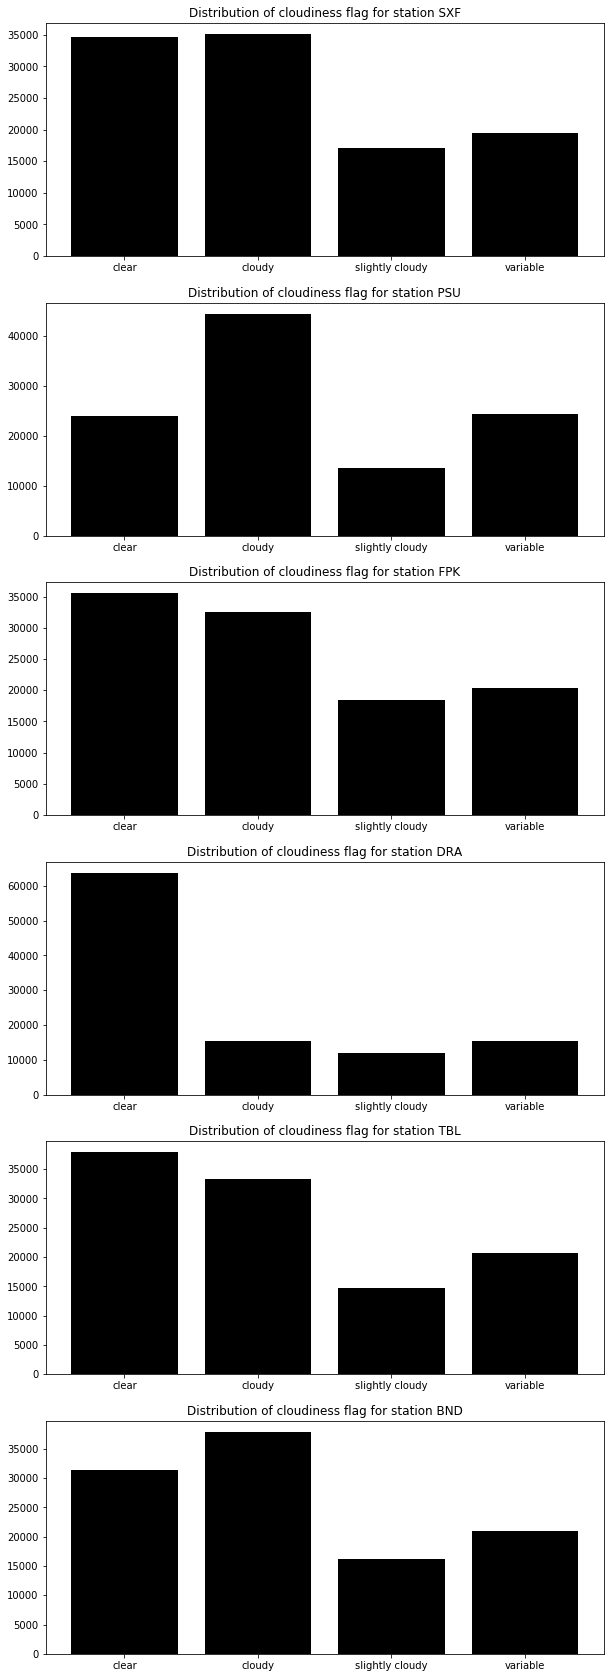

In [11]:
cloud_subplots(df, stat_cloudy, night=False)

In [12]:
admin_config_path = "../train_cfg.json"
with open(admin_config_path, "r") as fd:
    admin_config = json.load(fd)

In [13]:
target_datetimes = [datetime.datetime.fromisoformat(d) for d in admin_config["target_datetimes"]]

In [14]:
# station = [*stations][0]
station = 'DRA'
ghis = []
cs_ghis = []
for dt in target_datetimes[:]:
    dt += datetime.timedelta(minutes=15)
    cs_ghi = df.lookup([dt],[station + '_CLEARSKY_GHI'])[0]
    cs_ghis += [cs_ghi]
    ghi = df.lookup([dt],[station + '_GHI'])[0]
    ghis += [ghi]
    assert ~np.isnan(ghi)
    assert ~np.isnan(cs_ghi)

In [15]:
np.array([ghis,cs_ghis]).T

array([[-3.90666667e+00,  0.00000000e+00],
       [ 5.46986667e+02,  5.27979586e+02],
       [-4.04000000e+00,  0.00000000e+00],
       [ 5.54073333e+02,  5.37996306e+02],
       [-3.28666667e+00,  0.00000000e+00],
       [ 5.35600000e+02,  5.34871830e+02],
       [-2.64000000e+00,  0.00000000e+00],
       [ 1.94200000e+02,  4.98394927e+02],
       [ 1.11333333e+00,  1.21550426e-01],
       [ 4.25626667e+02,  4.56285026e+02],
       [ 1.53780000e+02,  1.71200203e+02],
       [ 3.45120000e+02,  3.28578942e+02],
       [ 2.36380000e+02,  2.04840773e+02],
       [ 3.59753333e+02,  3.80206857e+02],
       [ 1.87233333e+02,  1.62428131e+02],
       [ 4.05460000e+02,  4.15381167e+02],
       [ 4.49133333e+01,  1.19600476e+02],
       [ 4.23920000e+02,  4.47654850e+02],
       [ 9.50600000e+01,  7.78365262e+01],
       [ 3.21466667e+01,  5.00417728e+02],
       [ 2.46400000e+01,  1.02242402e+01],
       [ 5.18820000e+02,  5.22727054e+02],
       [-4.13333333e-01,  0.00000000e+00],
       [ 5.

In [16]:
# Explore more in depth the GHI values and CS GHI values
# For BND station
df.groupby("BND_CLOUDINESS")["BND_GHI","BND_CLEARSKY_GHI"].mean()

,BND_GHI,BND_CLEARSKY_GHI
BND_CLOUDINESS,,
clear,555.130842,5.258467e+02
cloudy,114.798382,3.603146e+02
night,-3.986705,6.367780e-08
slightly cloudy,380.614094,4.155404e+02
variable,377.629470,4.657356e+02


We notice that the value of GHI is very influenced by the cloudiness effect
Let's see if the season has the same effect

In [17]:
# Explore more in depth the GHI values and CS GHI values
# For BND station
df.groupby(df.index.strftime("%Y-%m"))["BND_GHI","BND_CLEARSKY_GHI"].mean()

,BND_GHI,BND_CLEARSKY_GHI
2010-01,80.263081,119.508976
2010-02,123.252914,164.637911
2010-03,148.388755,226.305760
2010-04,225.796540,284.254669
2010-05,227.399012,307.789928
...,...,...
2015-08,246.022331,283.618669
2015-09,192.295492,228.837195
2015-10,141.860228,178.331156
2015-11,89.672362,127.589056


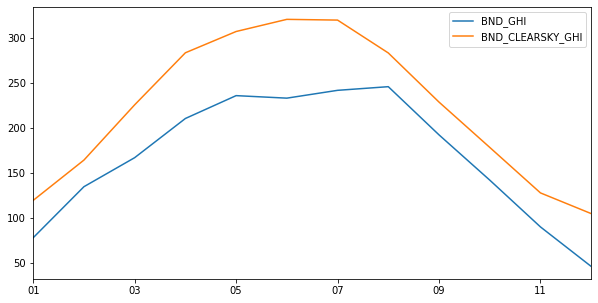

In [18]:
# Visualize year 2015 only
df2015 = df[df.index.strftime("%Y")=='2015']
df2015.groupby(df2015.index.strftime("%m"))["BND_GHI","BND_CLEARSKY_GHI"].mean().plot(figsize=(10,5))

We notice that the period of the year has a very big impact on the energy received by the planet Earth. In fact, the summer period is the highest over the year

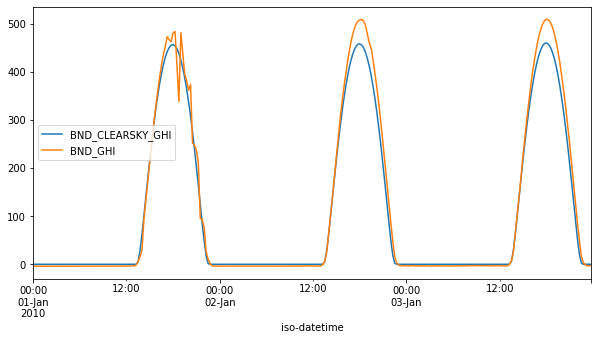

In [19]:
# Let's visualize on a daily basis (say 3 consecutive days)
df[0:96*3][["BND_CLEARSKY_GHI","BND_GHI"]].plot(figsize=(10,5))

Here we see that clear sky GHI doesn't take into account the cloudiness index. Also, in night time, the GHI value is nearly 0

## Missing GHI values
We have seen that for some reason, there is no GHI value reported for certain stations on certains timestamps. Let's visualize an example from BND station

In [20]:
df[df["BND_GHI"].isna()==True].head()

,ncdf_path,hdf5_8bit_path,hdf5_8bit_offset,hdf5_16bit_path,hdf5_16bit_offset,BND_DAYTIME,BND_CLEARSKY_GHI,BND_CLOUDINESS,BND_GHI,TBL_DAYTIME,...,GWN_CLOUDINESS,GWN_GHI,PSU_DAYTIME,PSU_CLEARSKY_GHI,PSU_CLOUDINESS,PSU_GHI,SXF_DAYTIME,SXF_CLEARSKY_GHI,SXF_CLOUDINESS,SXF_GHI
iso-datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-13 13:15:00,nan,/project/cq-training-1/project1/data/hdf5v7_8b...,21,/project/cq-training-1/project1/data/hdf5v5_16...,21,0.0,0.000000,night,NaN,0.0,...,cloudy,2.786667,1.0,52.962203,cloudy,25.780000,0.0,0.000000,night,-4.260000
2010-01-13 13:30:00,nan,/project/cq-training-1/project1/data/hdf5v7_8b...,22,/project/cq-training-1/project1/data/hdf5v5_16...,22,1.0,7.062227,cloudy,NaN,0.0,...,variable,13.986667,1.0,91.405969,cloudy,38.660000,0.0,0.000000,night,-4.513333
2010-01-13 13:45:00,nan,/project/cq-training-1/project1/data/hdf5v7_8b...,23,/project/cq-training-1/project1/data/hdf5v5_16...,23,1.0,31.555666,cloudy,NaN,0.0,...,slightly cloudy,49.506667,1.0,132.042871,cloudy,43.573333,0.0,0.000000,night,-3.773333
2010-06-11 00:15:00,/project/cq-training-1/project1/data/netcdf/GO...,/project/cq-training-1/project1/data/hdf5v7_8b...,65,/project/cq-training-1/project1/data/hdf5v5_16...,65,1.0,87.748810,cloudy,NaN,1.0,...,slightly cloudy,99.173333,1.0,9.706539,cloudy,41.320000,1.0,211.138315,variable,73.426667
2010-06-11 00:30:00,nan,/project/cq-training-1/project1/data/hdf5v7_8b...,66,/project/cq-training-1/project1/data/hdf5v5_16...,66,1.0,50.796792,cloudy,NaN,1.0,...,slightly cloudy,58.066667,1.0,0.752240,cloudy,12.906667,1.0,166.109735,variable,128.093333


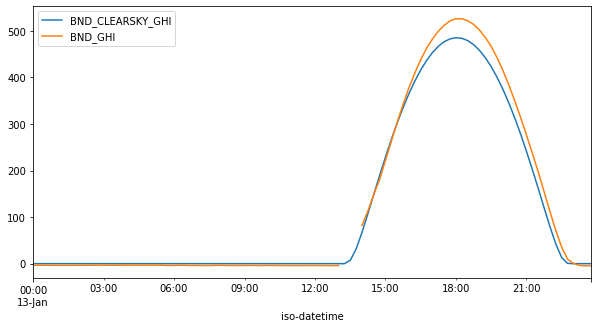

In [21]:
# We have for example missing values on 2010-01-13
df[df.index.date==pd.to_datetime("2010-01-13")][["BND_CLEARSKY_GHI","BND_GHI"]].plot(figsize=(10,5))

In this case, the missing values are on sunrise and not for a long time. To fill this gap we can use linear interpolation.

In [22]:
# fill missing values with lenear interpolation
df_01_13 = df[df.index.date==pd.to_datetime("2010-01-13")].interpolate(method='linear',limit_direction='both')

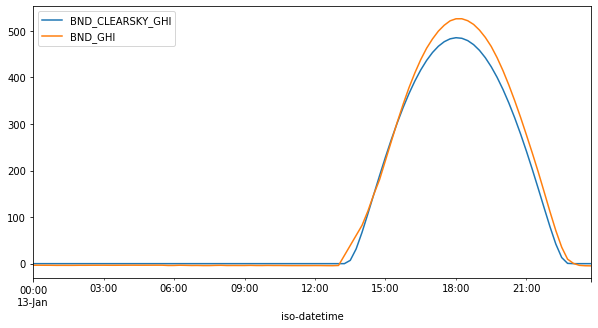

In [23]:
df_01_13[["BND_CLEARSKY_GHI","BND_GHI"]].plot(figsize=(10,5))

The quadratic interpolation `spline` gives the same approximation but needs more computation cost. So we recommand use linear approximation specifically for short gaps

For big holes, it is very problematic to approximate them with linear approximation.

In [24]:
df_ghi_na_2015 = df[(df["BND_GHI"].isna()==True) & (df.index.year==2015)][["BND_DAYTIME","BND_CLEARSKY_GHI","BND_CLOUDINESS","BND_GHI"]]#.groupby(df.index.strftime("%m"))["BND_GHI"].count()

In [25]:
df_ghi_na_2015.groupby(df_ghi_na_2015.index.date)["BND_DAYTIME"].count()

2015-01-10     1
2015-03-27     7
2015-06-10    40
2015-10-12    11
2015-10-29     2
2015-11-01     5
2015-11-22     5
Name: BND_DAYTIME, dtype: int64

In [26]:
pd.set_option('display.max_rows', 96)
df[df.index.date==pd.to_datetime("2015-06-10")][["hdf5_8bit_offset","BND_CLEARSKY_GHI","BND_GHI"]]

,hdf5_8bit_offset,BND_CLEARSKY_GHI,BND_GHI
iso-datetime,,,
2015-06-10 00:00:00,64,128.063623,150.000000
2015-06-10 00:15:00,65,86.210272,126.720000
2015-06-10 00:30:00,66,49.468348,91.320000
2015-06-10 00:45:00,67,20.839213,56.573333
2015-06-10 01:00:00,68,4.236210,26.880000
2015-06-10 01:15:00,69,0.077750,8.180000
2015-06-10 01:30:00,70,0.000000,0.260000
2015-06-10 01:45:00,71,0.000000,-3.393333
2015-06-10 02:00:00,72,0.000000,-4.300000


We have a big hole on 2015-06-10, let's visualize it:

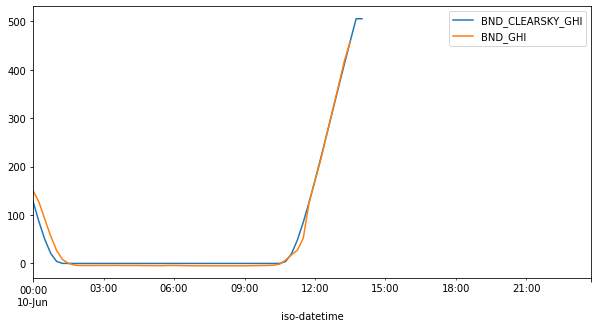

In [27]:
df[df.index.date==pd.to_datetime("2015-06-10")][["BND_CLEARSKY_GHI","BND_GHI"]].plot(figsize=(10,5))

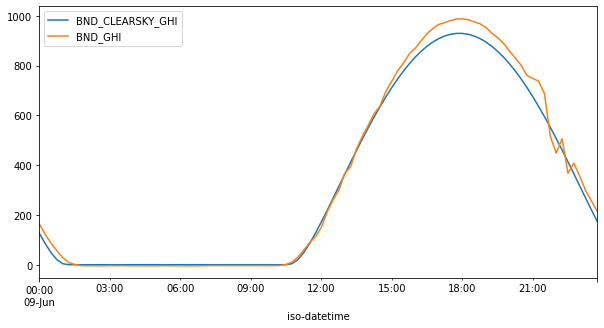

In [28]:
# The day before
df[df.index.date==pd.to_datetime("2015-06-09")][["BND_CLEARSKY_GHI","BND_GHI"]].plot(figsize=(10,5))

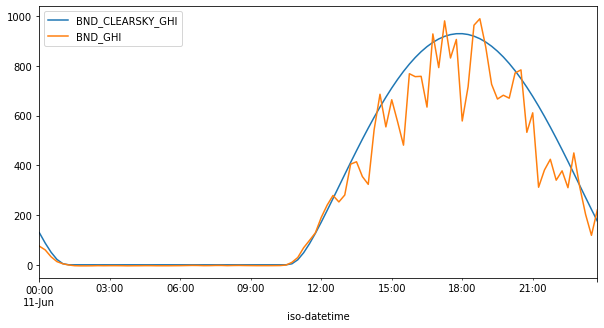

In [29]:
# The day after
df[df.index.date==pd.to_datetime("2015-06-11")][["BND_CLEARSKY_GHI","BND_GHI"]].plot(figsize=(10,5))

To handle the missing values on the `2015-06-10` we can use one of these options:\
1-Use linear interpolation using the values of the day after\
2-Skip the day and not use it for the training\
3-Complete the missing values with the mean of similar dates having the same cloudiness index

Here after, we define two methods to fill the missing GHI:
1-using linear interpolation
2-using the mean of the day before and the day after for the same timestamp

In [30]:
# We define the following method to to complete the missing GHI value
def fill_missing_ghi_linear(df, timestamp, station_id):
    ''' returns a dataframe with GHI values around the given timestamp.
        if missing GHI before or after this timestamp, it will be interpolated.
        it returns a sorted DF with timestamps indexes.
        Look for the missing one to get the interpolated GHI.
    '''
    ghi_col = station_id+"_GHI"
    cur_offset = df.loc[timestamp]["hdf5_8bit_offset"]
    GHI_values = pd.DataFrame(columns=[ghi_col])
    ts = timestamp
    GHI_values.at[ts] = df.loc[df.index == ts][ghi_col].values

    # Get previous and next available GHI value
    for i in range(1, np.int(cur_offset)):
        ts = ts - pd.DateOffset(minutes=15)
        prev_val = df.loc[df.index == ts][ghi_col].values
        if np.isnan(prev_val):
            GHI_values.at[ts] = np.NaN
        else:
            GHI_values.at[ts] = prev_val
            break
    ts = timestamp
    for j in range(1, np.int(95-cur_offset)):
        #print("j=",j)
        ts = ts + pd.DateOffset(minutes=15)
        next_val = df.loc[df.index == ts][ghi_col].values
        if np.isnan(next_val):
            GHI_values.at[ts] = np.NaN
        else:
            GHI_values.at[ts] = next_val
            break
    if len(GHI_values) == 0:
        print("No available values")
    else:
        # interpolate current GHI value
        GHI_values.sort_index(inplace=True)
    
    GHI_values = GHI_values[ghi_col].interpolate(method='linear', limit_direction='both')
    
    for i,j in enumerate(GHI_values.index):
        #print("before :",df.at[j,ghi_col])
        #print("GHI_values.iloc[i]",GHI_values.iloc[i])
        df.at[j,ghi_col]=GHI_values.iloc[i]
        #print("after :",df.loc[j][ghi_col])

    return df

In [31]:
# We define the following method to to complete the missing GHI value
def fill_missing_ghi_mean(df, timestamp, station_id):
    ''' returns a dataframe with GHI values that are calculated as the mean
        of the day before and the day after for the same timestamp.
    '''
    ghi_col = station_id+"_GHI"
    
    cur_day = df.loc[df.index.date==timestamp.date()]
    
    ts_day_befor = timestamp - pd.DateOffset(day=1)
    ts_day_after = timestamp + pd.DateOffset(day=1)
    
    get_previous_day = df[df.index.date==ts_day_befor][ghi_col]
    get_next_day = df[df.index.date==ts_day_after][ghi_col]
    
    day_concat = pd.concat((get_previous_day, get_next_day))
    
    mean_ghi = day_concat.groupby(day_concat.index.time).mean()
    
    # Get previous and next available GHI value
    for i,j in enumerate(cur_day.index):
        #print(i,j)
        if np.isnan(cur_day.iloc[i][ghi_col]):
            #print("before : ", df.iloc[i][ghi_col])
            df.at[j, ghi_col] = mean_ghi.iloc[i]
            #print("after : ", df.iloc[i][ghi_col])

    return df

In [32]:
#Experiment 1: filling the gap with linear interpolation
exp1 = fill_missing_ghi_linear(df, pd.to_datetime("2015-06-10 13:45:00"), "BND")

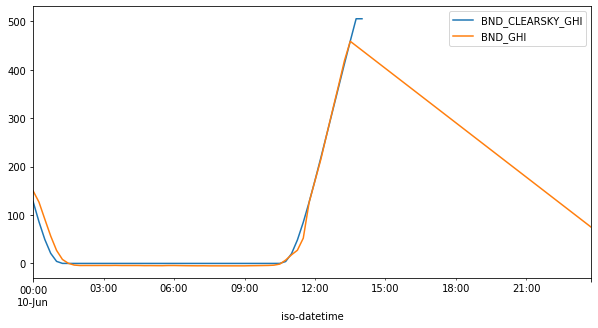

In [33]:
exp1[exp1.index.date==pd.to_datetime("2015-06-10")][["BND_CLEARSKY_GHI","BND_GHI"]].plot(figsize=(10,5))

In [34]:
# Reinitialize df
df = pd.read_pickle("../data/catalog.helios.public.20100101-20160101.pkl")

In [35]:
#Experiment 2: filling the gap with the mean day-before-day-after
exp2 = fill_missing_ghi_mean(df, pd.to_datetime("2015-06-10 13:45:00"), "BND")

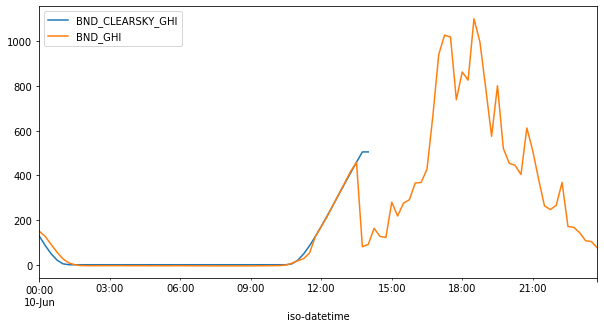

In [36]:
exp2[exp2.index.date==pd.to_datetime("2015-06-10")][["BND_CLEARSKY_GHI","BND_GHI"]].plot(figsize=(10,5))

We notice here that the linear filling was too simplistic whereas the mean filling is more realistic and could be a good transition from the day before to the day after.